<a href="https://colab.research.google.com/github/Stephen-sanchez1/datasci_4_web_viz/blob/main/cdc504.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# Fetch the data
url = "https://raw.githubusercontent.com/Stephen-sanchez1/datasci_4_web_viz/main/datasets/PLACES__Local_Data_for_Better_Health__County_Data_2023_release%20(1).csv"
df = pd.read_csv(url)
df.columns

Index(['Year', 'StateAbbr', 'StateDesc', 'LocationName', 'DataSource',
       'Category', 'Measure', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
       'Low_Confidence_Limit', 'High_Confidence_Limit', 'TotalPopulation',
       'LocationID', 'CategoryID', 'MeasureId', 'DataValueTypeID',
       'Short_Question_Text', 'Geolocation', 'Counties'],
      dtype='object')

In [14]:
# Filter for 'BINGE' as measureid and 'Age-adjusted prevalence' as data_value_type
df = df[(df['MeasureId'] == 'BINGE') & (df['Data_Value_Type'] == 'Age-adjusted prevalence')]
df

,Year,StateAbbr,StateDesc,LocationName,DataSource,Category,Measure,Data_Value_Unit,Data_Value_Type,Data_Value,...,Low_Confidence_Limit,High_Confidence_Limit,TotalPopulation,LocationID,CategoryID,MeasureId,DataValueTypeID,Short_Question_Text,Geolocation,Counties
228,2021,NJ,New Jersey,Burlington,BRFSS,Health Risk Behaviors,Binge drinking among adults aged >=18 years,%,Age-adjusted prevalence,18.3,...,15.5,21.3,464269,34005,RISKBEH,BINGE,AgeAdjPrv,Binge Drinking,POINT (-74.6630063 39.8757858),2447
304,2021,NJ,New Jersey,Ocean,BRFSS,Health Risk Behaviors,Binge drinking among adults aged >=18 years,%,Age-adjusted prevalence,17.2,...,14.4,20.4,648998,34029,RISKBEH,BINGE,AgeAdjPrv,Binge Drinking,POINT (-74.2588636 39.865669),489
380,2021,NJ,New Jersey,Passaic,BRFSS,Health Risk Behaviors,Binge drinking among adults aged >=18 years,%,Age-adjusted prevalence,16.2,...,13.9,18.9,518117,34031,RISKBEH,BINGE,AgeAdjPrv,Binge Drinking,POINT (-74.2994078 41.0366554),2493
457,2021,NJ,New Jersey,Union,BRFSS,Health Risk Behaviors,Binge drinking among adults aged >=18 years,%,Age-adjusted prevalence,16.5,...,14.2,19.2,572114,34039,RISKBEH,BINGE,AgeAdjPrv,Binge Drinking,POINT (-74.3086957 40.6598707),2532
506,2021,NJ,New Jersey,Salem,BRFSS,Health Risk Behaviors,Binge drinking among adults aged >=18 years,%,Age-adjusted prevalence,17.4,...,14.2,20.8,65046,34033,RISKBEH,BINGE,AgeAdjPrv,Binge Drinking,POINT (-75.3573559 39.5738282),2494
554,2021,NJ,New Jersey,Somerset,BRFSS,Health Risk Behaviors,Binge drinking among adults aged >=18 years,%,Age-adjusted prevalence,16.1,...,13.3,19.0,345647,34035,RISKBEH,BINGE,AgeAdjPrv,Binge Drinking,POINT (-74.6199378 40.5655273),490
570,2021,NJ,New Jersey,Sussex,BRFSS,Health Risk Behaviors,Binge drinking among adults aged >=18 years,%,Age-adjusted prevalence,20.4,...,17.1,24.3,145543,34037,RISKBEH,BINGE,AgeAdjPrv,Binge Drinking,POINT (-74.6919141 41.1374609),2586
672,2021,NJ,New Jersey,Cape May,BRFSS,Health Risk Behaviors,Binge drinking among adults aged >=18 years,%,Age-adjusted prevalence,19.8,...,16.4,23.4,95661,34009,RISKBEH,BINGE,AgeAdjPrv,Binge Drinking,POINT (-74.8463541 39.0858411),2449
802,2021,NJ,New Jersey,Morris,BRFSS,Health Risk Behaviors,Binge drinking among adults aged >=18 years,%,Age-adjusted prevalence,18.8,...,16.0,21.8,510981,34027,RISKBEH,BINGE,AgeAdjPrv,Binge Drinking,POINT (-74.5472917 40.8588961),2492
855,2021,NJ,New Jersey,Hunterdon,BRFSS,Health Risk Behaviors,Binge drinking among adults aged >=18 years,%,Age-adjusted prevalence,19.8,...,16.4,23.5,129924,34019,RISKBEH,BINGE,AgeAdjPrv,Binge Drinking,POINT (-74.9119695 40.5652832),2488


In [15]:
# Group by 'LocationName' and get the average (or sum) 'Data_Value'
grouped = df.groupby('LocationName').Data_Value.mean().sort_values(ascending=False)
grouped


LocationName
Sussex        20.4
Hunterdon     19.8
Cape May      19.8
Morris        18.8
Gloucester    18.7
Warren        18.4
Monmouth      18.4
Burlington    18.3
Atlantic      17.9
Salem         17.4
Camden        17.3
Ocean         17.2
Cumberland    17.0
Bergen        16.7
Union         16.5
Passaic       16.2
Somerset      16.1
Essex         15.4
Hudson        15.2
Mercer        15.1
Middlesex     13.8
Name: Data_Value, dtype: float64

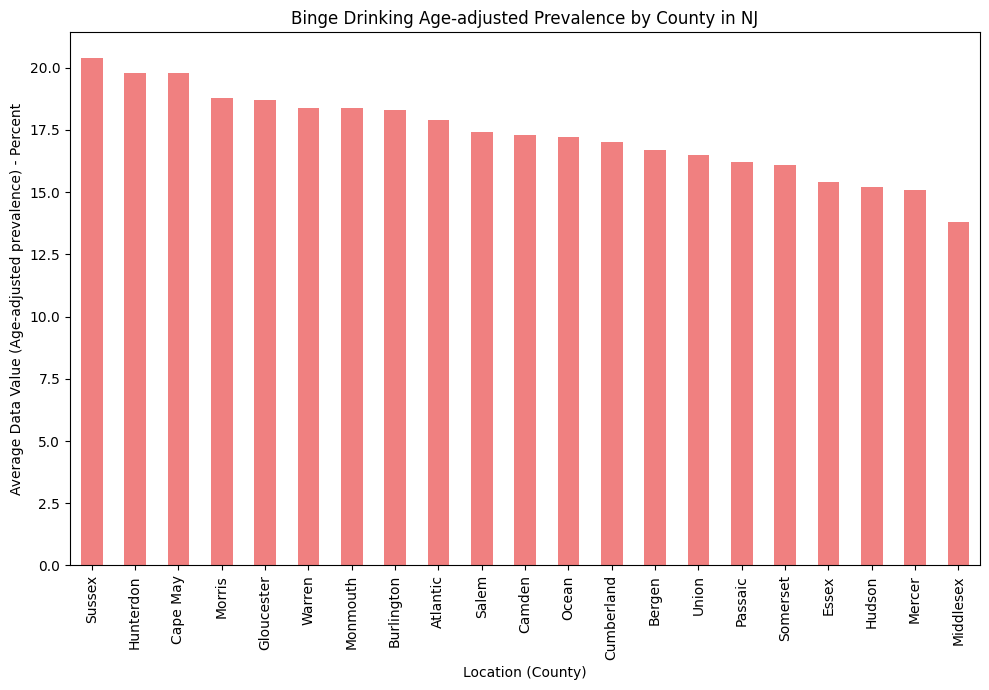

In [16]:
# Plotting
plt.figure(figsize=(10, 7))
grouped.plot(kind='bar', color='lightcoral')
plt.ylabel('Average Data Value (Age-adjusted prevalence) - Percent')
plt.xlabel('Location (County)')
plt.title('Binge Drinking Age-adjusted Prevalence by County in NJ')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("binge_drinking_per_location.png")  # Saving the plot as an image
plt.show()

In [17]:
import ipywidgets as widgets

# Compute the average data value across all counties
avg_data_value = df['Data_Value'].mean()

# Sort the counties in ascending order for the dropdown list
sorted_counties = sorted(df['LocationName'].unique())

# Interactive selection of county for visualization using ipywidgets
@widgets.interact(County=sorted_counties)
def plot_data(County):
    county_value = df[df['LocationName'] == County]['Data_Value'].values[0]

    # Labels for bars
    labels = [County, 'Average across all counties']

    # Data values for bars
    values = [county_value, avg_data_value]

    plt.figure(figsize=(8, 6))

    # Plot the bars
    colors = ['lightcoral', 'lightblue']
    plt.bar(labels, values, color=colors)

    plt.ylabel('Data Value (Age-adjusted prevalence) - Percent')
    plt.title(f'Binge Drinking Age-adjusted Prevalence in {County} vs Average across all counties')

    plt.tight_layout()
    plt.show()

interactive(children=(Dropdown(description='County', options=('Atlantic', 'Bergen', 'Burlington', 'Camden', 'C…